In [73]:
import pickle
from collections import Counter
import numpy as np
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import regex as re
from nltk.stem import PorterStemmer
# from wordcloud import STOPWORDS
import numpy as np
import nltk
nltk.download("stopwords")
stopword=stopwords.words('english')
# stops = set(stopwords.words('english'))
# for i in stops:
#     STOPWORDS.add(i)

ps = PorterStemmer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
train = pd.read_csv("BBC News Train.csv")
test = pd.read_csv("BBC News Test.csv")
train.drop_duplicates(subset=["Text"], inplace=True)
print(train.shape, test.shape)

(1440, 3) (735, 2)


In [76]:
print(train.tail())
print(train.info())
print(train.nunique())

      ArticleId                                               Text  \
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
1485  entertainment  
1486  entertainment  
1487       business  
1488           tech  
1489           tech  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1440 non-null   int64 
 1   Text       1440 non-null   object
 2   Category   1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.0+ KB
None
ArticleId    1440
Text         1440
Category        5
dtype: int64


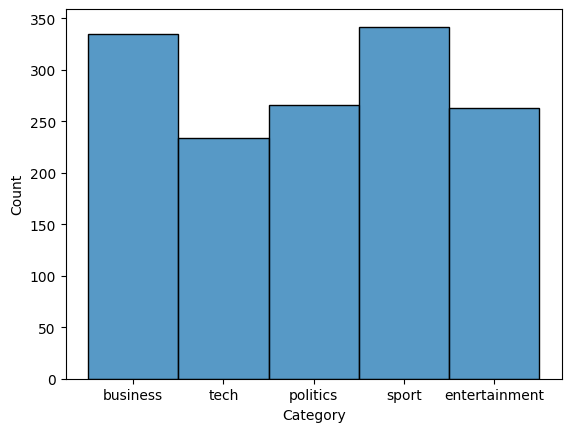

In [77]:
sns.histplot(train.Category)
plt.show()

Mean text length:  2234.2618055555554  Min length:  501  Max length:  18387


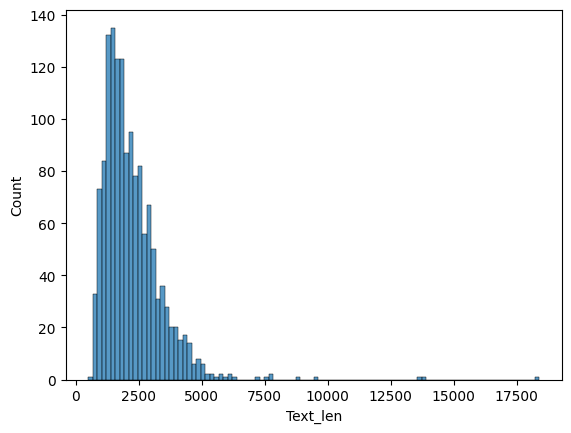

In [78]:
train["Text_len"] = train.Text.apply(lambda x: len(x))
print("Mean text length: ", np.mean(train.Text_len)," Min length: ", np.min(train.Text_len)," Max length: ", np.max(train.Text_len))
sns.histplot(train.Text_len, bins=100)
plt.show()


Original train shape: (1440, 4)
The mean number of category is  288.0
sport            342
business         335
politics         266
entertainment    263
tech             234
Name: Category, dtype: int64

New train shape: (1339, 4)
business         288
sport            288
politics         266
entertainment    263
tech             234
Name: Category, dtype: int64


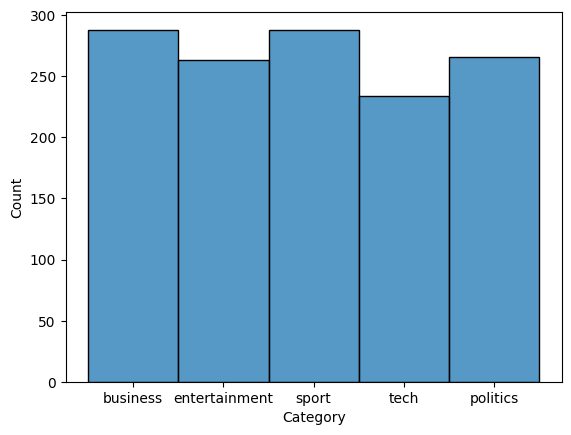

In [79]:
print("\nOriginal train shape:", train.shape)
print("The mean number of category is ", train.Category.value_counts().mean())
print(train.Category.value_counts())

mean_num = 288

sport_subset = train[train.Category == 'sport'].sample(n=mean_num, random_state=42, replace=True)
business_subset = train[train.Category == 'business'].sample(n=mean_num, random_state=42, replace=True)
politics_subset = train[train.Category == 'politics']
entertainment_subset = train[train.Category == 'entertainment']
tech_subset = train[train.Category == 'tech']

train_subset = pd.concat([sport_subset, business_subset, politics_subset, entertainment_subset, tech_subset], axis=0)
train = train_subset.sample(frac=1, random_state=42)

print("\nNew train shape:", train.shape)
print(train.Category.value_counts())
sns.histplot(train.Category)
plt.show()

In [80]:
def  processString(text):
  # print("___")
  symbols = "!\"#$%&()*+-./:;,<=>?@[\]^_`{|}~\n"
  for num in symbols:
    text = text.replace(num, " ")
    text = text.replace("  ", " ")
  text = text.replace("'", " ")
  text = text.replace("  ", " ")
  tokens_in_text = word_tokenize(text)
  for i in range(len(tokens_in_text)):
    token = tokens_in_text[i]
    token = token.strip()
    token = token.lower()
    token = ps.stem(token)
    tokens_in_text[i] = token;
  tokens_in_text =  [w for w in tokens_in_text if w not in stopword]
  return tokens_in_text

In [81]:
temp=[]
for i in train.Text:
    temp.append(processString(i))
train.Text=temp

In [82]:
print(train)

      ArticleId                                               Text  \
1283        430  [venezuela, identifi, idl, farm, venezuelan, a...   
244        1294  [spector, face, legal, action, music, produc, ...   
804         408  [bush, get, tough, deficit, us, presid, georg,...   
801        1271  [umbro, profit, lift, euro, 2004, uk, sportswe...   
253        1387  [adriano, chelsea, link, reject, adriano, agen...   
...         ...                                                ...   
1444       1886  [label, withdraw, mcfadden, video, new, video,...   
134         227  [learn, love, broadband, reach, point, broadba...   
1123        478  [briton, fed, net, servic, survey, conduct, pc...   
139         690  [vera, drake, scoop, film, award, oscar, hope,...   
106         618  [rival, £400, appl, mac, mini, cheapest, appl,...   

           Category  Text_len  
1283       business      1761  
244   entertainment      1951  
804        business      1299  
801        business      1351  

In [83]:
from sklearn.model_selection import train_test_split
train_split, test_split = train_test_split(train, train_size=0.70)

In [111]:
train_split.reset_index(inplace=True)
test_split.reset_index(inplace=True)

In [112]:
#counting number of words in a perticular class
def class_words(train_data):
    word_dict= {}
    for i in train_data.index:
        try:
            word_dict[train_data['Category'][i]] = word_dict[train_data['Category'][i]] + train_data['Text'][i]
        except:
            word_dict[train_data['Category'][i]] = train_data['Text'][i]
    return word_dict
    

In [115]:
# for i in range(len(train_split)):
#     print(train_split.loc[i,'Category'])
# for i in train_split.index:
#     print(train_split['Category'][i])

# train_split.reset_index(inplace=True)

business
business
entertainment
sport
politics
politics
business
tech
business
politics
politics
politics
tech
politics
sport
tech
politics
sport
politics
politics
politics
politics
entertainment
business
politics
entertainment
sport
politics
politics
tech
entertainment
tech
sport
sport
entertainment
business
politics
politics
entertainment
sport
sport
tech
tech
tech
politics
business
sport
entertainment
politics
entertainment
business
politics
politics
entertainment
entertainment
politics
tech
politics
politics
business
business
sport
entertainment
politics
entertainment
politics
politics
tech
sport
sport
politics
business
business
sport
politics
tech
entertainment
entertainment
business
politics
tech
entertainment
entertainment
politics
sport
politics
politics
politics
business
sport
tech
sport
entertainment
entertainment
entertainment
politics
tech
politics
entertainment
politics
sport
tech
politics
business
entertainment
business
tech
entertainment
entertainment
entertainment
enter

In [85]:
 #counting number of UNIQUE words in a perticular class
def calulate_unique_word(word_dict):
    distinct_words = set()
    for i in word_dict:
        distinct_words = distinct_words | set(word_dict[i])
    distinct_words_c = len(distinct_words)
    return distinct_words,distinct_words_c

In [120]:
#class frequency for each word
def calculate_CF(word_dict):
    CF = {}

    #creating the list for each class
    for i in word_dict:
        for w in set(word_dict[i]):
            CF[w] = 0

    for i in word_dict:
        for w in set(word_dict[i]):
            CF[w]+=1
    return CF

In [87]:
def class_freq(word,CF):
    rand = 0
    try:
        rand = CF[word]
    except:
        pass
    return rand

In [88]:
def calculate_tficf(word_dict,CF):
    tf_icf = {}
    N=5
    for i in word_dict:
        dumy_dict={}
        count=Counter(word_dict[i])
        w_count=len(word_dict[i])
        
        for word in set(word_dict[i]):
            term_freq = count[word]/w_count
            clas_freq = class_freq(word,CF)
            inv_class_freq = np.log((N)/(clas_freq))
            dumy_dict[word] = term_freq*inv_class_freq
        tf_icf[i] = dumy_dict
    return tf_icf

In [124]:
def tficf_k_feature(TF_ICF,feature_values):
    featTFICF=[]
    k_feature={}
    for i in TF_ICF.keys():
        c_feature=[]
        every_sk = sorted(TF_ICF[i], key=TF_ICF[i].get, reverse=True)
        for j in every_sk[0:int(feature_values)]:
            featTFICF.append(j)
            c_feature.append(j)
        k_feature[i] = c_feature
    return k_feature,featTFICF

In [125]:

def freq_count(classes,featTFICF,k_feature):
    class_f = {}
    class_c = {}

    for i in classes:
        counter_kFeature = Counter(k_feature[i])
        for j in featTFICF:
            class_f[i, j] = counter_kFeature[j]
            try:
                class_c[i] = class_c[i] + counter_kFeature[j]
            except:
                class_c[i] = counter_kFeature[j]
    return class_f,class_c

In [126]:
def frequency(word, label,class_f,class_c):
    try:
        return class_f[label, word], class_c[label]
    except:
        return 0, class_c[label]

In [122]:
#Naive Bayes classifier
def NaiveBayes(distinct_words_c,train_class_split,train_data,test_data,cls,class_f,class_c):
    true_values = []
    pred_values = []
    for i in range(test_data.shape[0]):
        true_values.append(test_data[1][i])
        prob_classesWord = []
        for l in cls:
            prob_w = 0
            for w in test_data[0][i]:
                freq, count = frequency(w, l,class_f,class_c)
                pp = (freq + 1) / (count + distinct_words_c)
                prob_w += np.log(pp)
            prob_w += np.log(train_class_split[l] / train_data.shape[0])            
            prob_classesWord.append(prob_w)           
        pred_values.append(cls[np.argmax(prob_classesWord)])        
    return true_values,pred_values

In [127]:
def accuracy(predicted, true):
    c = len([1 for i in range(len(predicted)) if predicted[i]==true[i]])
    return c/len(predicted)

In [128]:
def confusion_matrix(predicted, true,classes):
    confusion = np.zeros((len(classes), len(classes))).astype(int)
    for i in range(len(predicted)):
        confusion[classes.index(predicted[i])][classes.index(true[i])] += 1
    return confusion

In [130]:
classes = ['business', 'sport', 'politics', 'entertainment', 'tech']
word_dict = class_words(train_split)
distinct_words,distinct_words_c = calulate_unique_word(word_dict)
CF = calculate_CF(word_dict)
tficf = calculate_tficf(word_dict,CF)
feature_values = [10,20,40,60]
for f_values in feature_values:
    k_feature,featTFICF = tficf_k_feature(tficf,f_values)
    class_f,class_c = freq_count(classes,featTFICF,k_feature)
    true_values,pred_values = NaiveBayes(distinct_words_c,train_class_split,train_data,test_data,classes,class_f,class_c)
    acc = accuracy(pred_values,true_values)
    print("Accuracy at %0.1f and at feature value %d : " % (ratio,f_values),acc)
    conf = confusion_matrix(pred_values,true_values,classes)
    print(conf)
    features.append(f_values)
    pref.append(acc)
    train_size.append(ratio)

NameError: name 'train_class_split' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_split, train_split['Category'], test_size=0.33, random_state=125
)

Try N grams
